In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [2]:
import tensorflow as tf
import numpy as np

from tqdm import tqdm    # tqdm

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import random

import time
import re
import os
import io

## 데이터 준비

In [3]:
'''
import tarfile

# 1. wget을 사용하여 파일 다운로드
url = "https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz"
filename = "korean-english-park.train.tar.gz"

# 다운로드 명령어 실행
!wget -O {filename} {url}
'''

--2024-07-09 02:12:12--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2024-07-09 02:12:12--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [4]:
'''
# tar.gz 파일 추출
extracted_dir = "./data"

def extract_tarfile(file_path, extract_path):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)

# 파일 추출 실행
extract_tarfile(filename, extracted_dir)
'''

Extracted files:
./data/korean-english-park.train.ko
./data/korean-english-park.train.en


In [3]:
# 추출된 파일 확인
extracted_dir = "./data"
filenames = []
print("Extracted files:")
for root, dirs, files in os.walk(extracted_dir):
    filenames=files
    for name in files:
        print(os.path.join(root, name))

Extracted files:
./data/korean-english-park.train.ko
./data/korean-english-park.train.en
./data/korean-english-park.train.tar.gz


## 데이터 확인

In [4]:
# 한국어 데이터
path_to_file = './data/'+filenames[0]
with open(path_to_file, "r") as f:
    kor_raw = f.read().splitlines()

print("Data Size:", len(kor_raw))
print("Example:")

for sen in kor_raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [5]:
# 영어 데이터
path_to_file = './data/'+filenames[1]
with open(path_to_file, "r") as f:
    eng_raw = f.read().splitlines()

print("Data Size:", len(eng_raw))
print("Example:")

for sen in eng_raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lungs the kind of workout they get from aerobic activities such as brisk walking or running for at least 20 minutes.


## 데이터 정제

### 중복 제거
set() 활용

In [6]:
paired_list = list(zip(kor_raw, eng_raw))
print("중복 제거 전 데이터 길이: ", len(paired_list))
print(paired_list[0])

중복 제거 전 데이터 길이:  94123
('개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"', 'Much of personal computing is about "can you top this?"')


In [7]:
cleaned_corpus = list(set(paired_list))
print("중복 제거 후 데이터 길이: ", len(cleaned_corpus))
print(cleaned_corpus[0])

중복 제거 후 데이터 길이:  78968
('한편 샤킬과 쇼니 커플은 마이애미비치 포슈아일랜드에 위치한 저택을 구입 당시보다 13만달러가 비싼 3200만달러에 판 것으로 확인됐다.', "The couple has also listed their home on Miami Beach's posh Star Island for about $32 million, or roughly $13 million than they paid for it after O'Neal was traded to the Heat by the Los Angeles Lakers before the 2004-05 season.")


### 전처리

In [8]:
def kor_preprocess_sentence(sentence):
    sentence = re.sub(r"([?!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣ㅏ-ㅣ?!,]+", " ", sentence)

    sentence = sentence.strip()
    
    return sentence

In [9]:
def eng_preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?!,]+", " ", sentence)

    sentence = sentence.strip()

    sentence = '<start> ' + sentence
    sentence += ' <end>'
    
    return sentence

In [10]:
enc_corpus = []
dec_corpus = []

for pair in cleaned_corpus:
    kor = pair[0]
    eng = pair[1]

    enc_corpus.append(kor_preprocess_sentence(kor))
    dec_corpus.append(eng_preprocess_sentence(eng))

print("Korean:", enc_corpus[100])
print("English:", dec_corpus[100])

Korean: 몇몇 사설 경제학자들은 경기가 하락할 것이라는 의 전망으로 전세계 에서 , 만 명 이상이 실업자로 남아 있을 수도 있다고 말했습니다
English: <start> some private economists say the imf s forecast of a drop could leave million or more people out of work around the world ? <end>


## 토큰화

In [11]:
from konlpy.tag import Mecab
from collections import Counter

In [12]:
def konlpy_tokenize(corpus):
    print("한국어 데이터 토큰화 시작")
    # 토큰화
    tokenizer = Mecab()
    tokenized = []
    for sentence in tqdm(corpus):
        tokenized.append(tokenizer.morphs(sentence))
        
    # 사전 구성
    words = np.concatenate(tokenized).tolist()
    counter = Counter(words)
    counter = counter.most_common(30000)
    vocab = [key for key, _ in counter]
    word2idx = {word:index+2 for index, word in enumerate(vocab)}    # 인덱스 0, 1은 패딩과 unk 토큰을 위해 비워둠
    word2idx[0] = '<pad>'
    word2idx[1] = '<unk>'
    
    # 텍스트를 정수 시퀀스로 변환
    tensor = [[word2idx.get(word, 1) for word in sentence] for sentence in tokenized]  # 없는 단어는 0으로
    
    return tensor, word2idx

In [13]:
def space_tokenize(corpus):
    print("영어 데이터 토큰화 시작")
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    # 공백 기준 토큰화
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    return tensor, tokenizer

In [14]:
# 토큰화하기
enc_input, enc_word2idx = konlpy_tokenize(enc_corpus)
dec_input, dec_tokenizer = space_tokenize(dec_corpus)

한국어 데이터 토큰화 시작


100%|██████████| 78968/78968 [00:12<00:00, 6464.15it/s]


영어 데이터 토큰화 시작


### 토큰 개수 확인

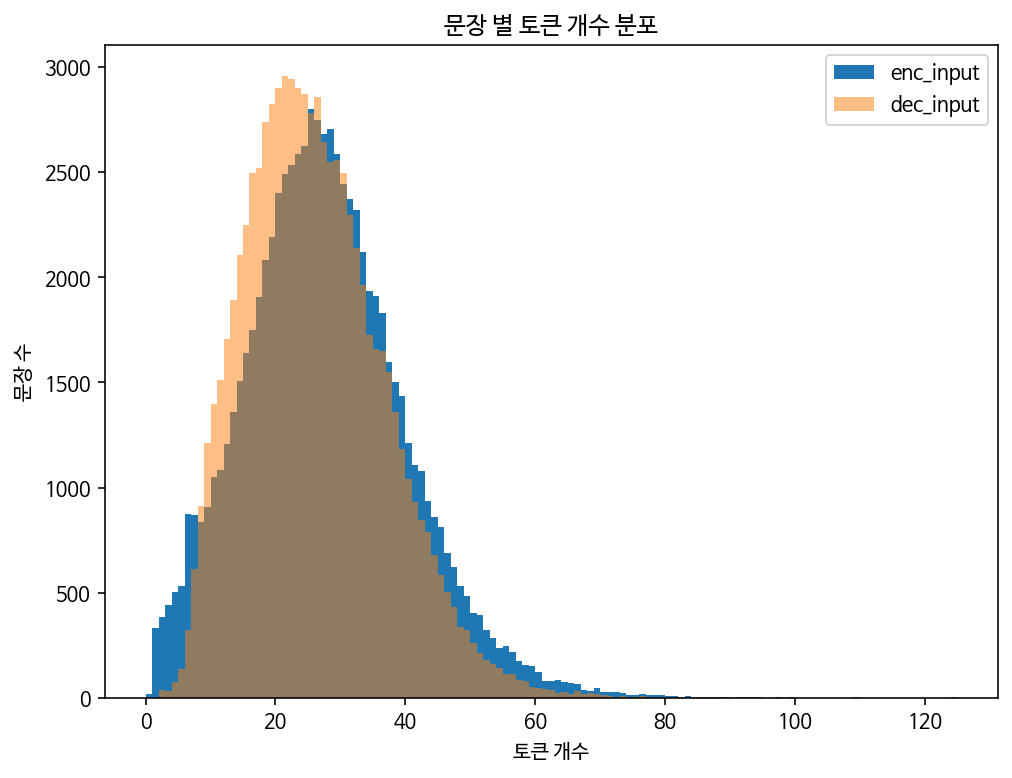

토큰 개수가 40 이상인 문장의 비율
인코더 입력: 13.47%
디코더 입력: 9.06%


In [15]:
# 각 문장의 토큰 개수 계산
enc_token_lengths = [len(tokens) for tokens in enc_input]
dec_token_lengths = [len(tokens) for tokens in dec_input]

# 그래프로 토큰 개수 분포 확인
plt.figure(figsize=(8, 6))
plt.hist(enc_token_lengths, bins=range(0, max(enc_token_lengths) + 1, 1), label='enc_input')
plt.hist(dec_token_lengths, bins=range(0, max(dec_token_lengths) + 1, 1), label='dec_input', alpha=0.5)
plt.xlabel('토큰 개수')
plt.ylabel('문장 수')
plt.title('문장 별 토큰 개수 분포')
plt.legend()
plt.show()

# 토큰 개수 40 이상인 문장 비율 확인
SEQ_LENGTH=40
print("토큰 개수가 40 이상인 문장의 비율")
cnt=0
for enc_seq in enc_input:
    if len(enc_seq) > SEQ_LENGTH:
        cnt+=1
print("인코더 입력: %.2f%%" % (cnt/len(enc_input)*100))
cnt=0
for dec_seq in dec_input:
    if len(dec_seq) > SEQ_LENGTH:
        cnt+=1
print("디코더 입력: %.2f%%" % (cnt/len(dec_input)*100))

In [16]:
enc_input_filtered = []
dec_input_filtered = []

for enc_seq, dec_seq in zip(enc_input, dec_input):
    if len(enc_seq) <= SEQ_LENGTH and len(dec_seq) <= SEQ_LENGTH:
        enc_input_filtered.append(enc_seq)
        dec_input_filtered.append(dec_seq)

In [17]:
enc_input = tf.keras.preprocessing.sequence.pad_sequences(enc_input_filtered, padding='post')
dec_input = tf.keras.preprocessing.sequence.pad_sequences(enc_input_filtered, padding='post')

print(enc_input.shape)
print(dec_input.shape)

(65137, 40)
(65137, 40)


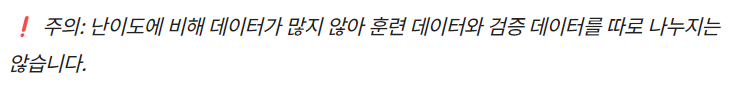

## 모델링
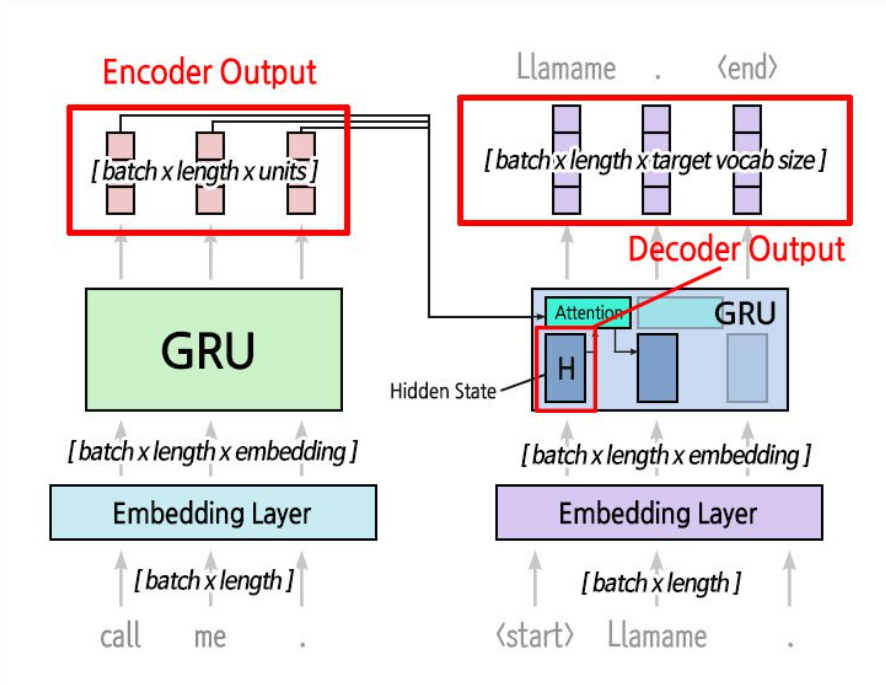

> **모델 선정 이유**: seq2seq 모델은 입력 시퀀스의 길이에 구애받지 않고 출력 시퀀스를 만들어낼 수 있고, RNN 모델과 달리 디코더에서 입력 시퀀스 전체의 정보를 가지고 있기 때문에 번역 task에 적당하다. 또한 attention을 활용하여 문장 전체에서 관련있는 부분만을 집중하게 할 수 있다. 다만, 컨텍스트 벡터를 생성하고 어텐션을 계산하는 과정에서 병목 현상이 일어날 수 있는 등 모델 자체의 한계 때문에 좋은 성능을 기대하기는 어렵다  
> **metric 선정 이유**: 직접 입력 텍스트를 넣어보고 번역 성능을 판단할 수 있기 때문에 따로 metric을 사용하지 않았다.  
> **loss 선정 이유**: SparseCategoricalCrossentropy() 함수를 사용해 단어장의 단어 중 선택하는 다중 클래스 분류의 loss를 활용함. 또한 loss_function을 따로 정의하여 패딩에 대한 처리를 해 줌  


In [18]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)   # [batch x length x units]
        h_dec = tf.expand_dims(h_dec, 1)    # [batch x 1 x units]
        h_dec = self.w_dec(h_dec)   # [batch x 1 x units]

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))   # [batch x length x 1]
        attn = tf.nn.softmax(score, axis=1) # [batch x length x 1]
        context_vec = attn * h_enc  # [batch x length x units]
        context_vec = tf.reduce_sum(context_vec, axis=1)    # [batch x units]
        return context_vec, attn

In [19]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)

    def call(self, x):
        x = self.embedding(x)
        states = self.gru(x)
        return states

In [20]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.attention = BahdanauAttention(dec_units)   # Attention 필수 사용!
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        x = self.embedding(x)
        x = tf.concat([x, tf.expand_dims(context_vec, axis=1)], axis=-1)    # [batch x length x (embedding_dim+units)]
        seq, state = self.gru(x)    # [batch x 1 x units], [batch x units]
        seq = tf.squeeze(seq, axis=1)   # Dense 레이어에 입력하기 위함
        seq = self.fc(seq)    # 출력 차원을 vocab_size로 변환 [batch x vocab_size]

        return seq, state, attn

In [21]:
# 코드를 실행하세요.
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_word2idx) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sample_enc = tf.random.uniform((BATCH_SIZE, SEQ_LENGTH))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 40, 1024)
Decoder Output: (64, 44565)
Decoder Hidden State: (64, 1024)
Attention: (64, 40, 1)


## 훈련
커스텀 손실 함수를 사용해야 하므로 `fit()` 사용하지 않음

In [22]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
# CategoricalCrossentropy()라면 [ 0.1, 0.2, 0.7 ] 과 One-hot 인코딩된 라벨 [0, 0, 1] 을 비교하여 점수를 채점하겠지만, SparseCategoricalCrossentropy() 함수라면 [ 0.1, 0.2, 0.7 ] 과 정수 인덱스 답안 2 를 비교하여 점수를 채점하는 거죠.
# from_logits 는 확률 분포가 Softmax를 거쳐서 들어오는지, 모델의 출력값 그대로 들어오는지를 결정
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    # 패딩에 대한 처리를 해주지 않으면 <PAD> 토큰만을 생성할 확률이 굉장히 높아짐. 이 문제를 방지하기 위해 mask 사용
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

In [23]:
@tf.function
#  훈련 외적인 텐서플로우 연산을 GPU에서 동작하게 해 훈련을 가속할 수 있도록 도와줌
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    batch_size = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)    # 컨텍스트 벡터 생성
        h_dec = enc_out[:, -1]    # 첫번째 스텝에서는 인코더의 마지막 hidden state를 context vector로 사용
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * batch_size, 1)    # 첫번째 스텝의 입력은 시작 토큰

        for t in range(1, tgt.shape[1]):    # 입력 문장의 길이만큼 반복(pad_sequences의 인자)
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)    # 현재 스텝까지의 실제값과 예측값 비교
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))    # 배치 평균 loss

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [24]:
import random

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_input.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_input[idx:idx+BATCH_SIZE],
                                dec_input[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 10: 100%|██████████| 987/987 [10:34<00:00,  1.56it/s, Loss 3.6746]


## 평가 
번역 성능 평가 및 attention map 시각화

In [24]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((SEQ_LENGTH, SEQ_LENGTH))
    
    sentence = kor_preprocess_sentence(sentence)
    tokenizer = Mecab()
    tokenized_sentence = tokenizer.morphs(sentence)
    inputs = [[enc_word2idx.get(word, 1) for word in sentence]]
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=SEQ_LENGTH,
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(SEQ_LENGTH):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))

Input: 자동화 기술은 우체국에서 , 그리고 업무가 끝난 후 사무실 경비에 , 그리고 의심스러운 차량을 수색하는 데 사용될 수 있습니다.
Predicted translation: the , . the , . the , . the , . the , . the , . the , . the , . the , . the , . the , . the , . the , . the 


/tmp/ipykernel_179/1233599763.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_179/1233599763.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


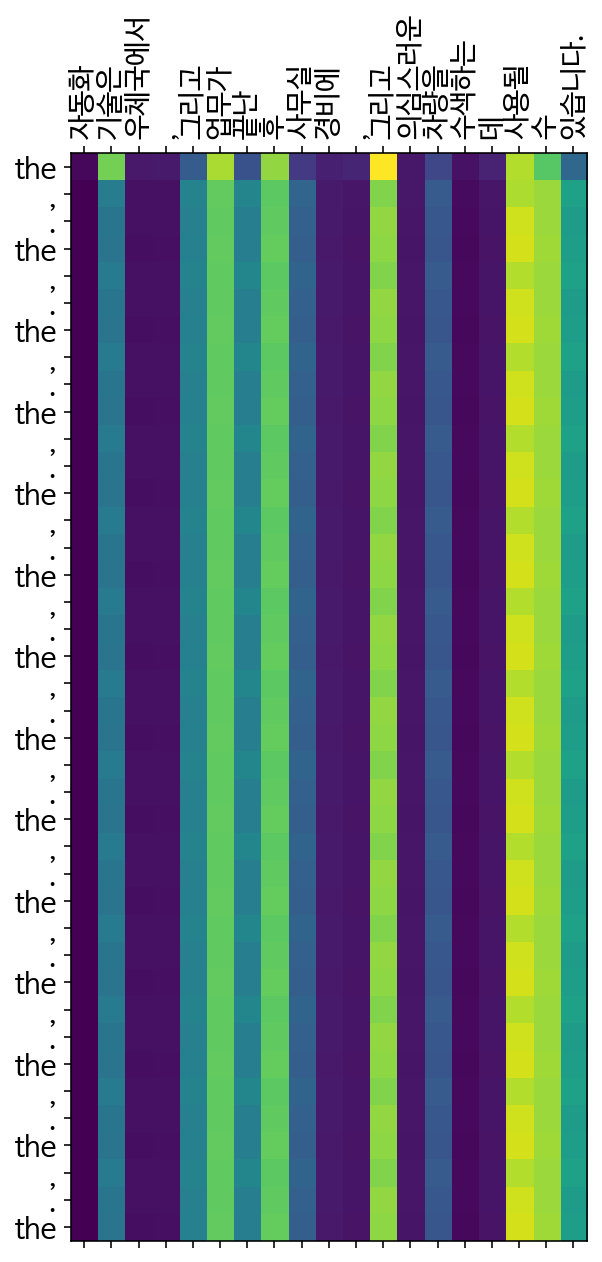

In [26]:
sample = kor_raw[29]
translate(sample, encoder, decoder)

Input: 오바마는 대통령이다.
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


/tmp/ipykernel_179/1233599763.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_179/1233599763.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


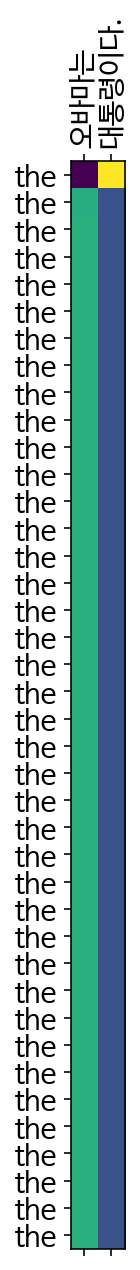

Input: 시민들은 도시 속에 산다.
Predicted translation: . the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


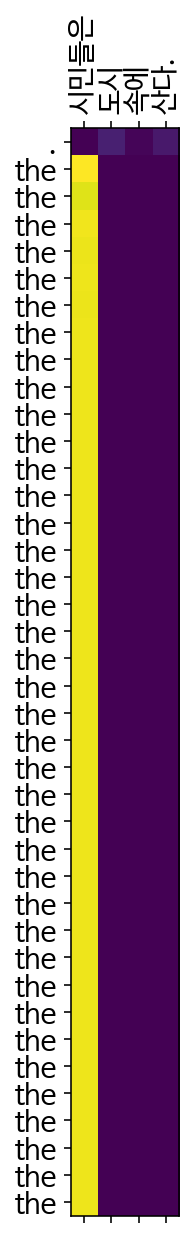

Input: 커피는 필요 없다.
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


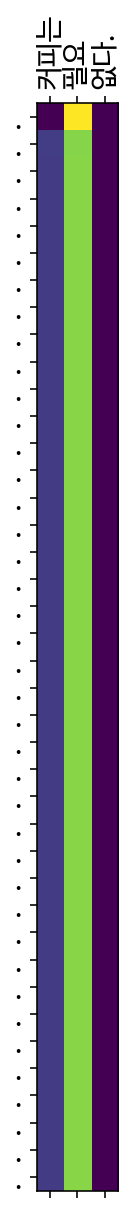

Input: 일곱 명의 사망자가 발생했다.
Predicted translation: . <start> <start> <start> <start> to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to to 


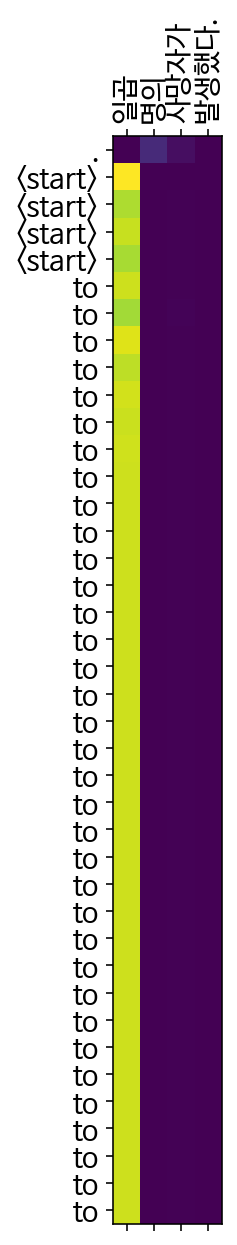

In [27]:
src = ['오바마는 대통령이다.',
       '시민들은 도시 속에 산다.',
       '커피는 필요 없다.',
       '일곱 명의 사망자가 발생했다.']
for sentence in src:
    translate(sentence, encoder, decoder)

기존 모델을 변형하지 않고 진행했을 때는 성능이 매우 나쁨. 자주 나오는 the, to로만 예측하는 경향이 있음. 마침표는 전처리 과정에서 삭제하는 게 좋을 것 같음. 데이터셋이나 평가 문장 모두 한 문장이므로

## 추가 실험
- 드롭아웃 추가 및 하이퍼파라미터 튜닝
- 단어 개수 10000, 30000 (한국어 데이터 42303개)

In [25]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, dropout_rate=0):
        super(Decoder, self).__init__()
        self.attention = BahdanauAttention(dec_units)   # Attention 필수 사용!
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)  # 드롭아웃 추가

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        x = self.embedding(x)
        x = tf.concat([x, tf.expand_dims(context_vec, axis=1)], axis=-1)    # [batch x length x (embedding_dim+units)]
        seq, state = self.gru(x)    # [batch x 1 x units], [batch x units]
        seq = self.dropout(seq)  # 드롭아웃 적용
        seq = tf.squeeze(seq, axis=1)   # Dense 레이어에 입력하기 위함
        seq = self.fc(seq)    # 출력 차원을 vocab_size로 변환 [batch x vocab_size]

        return seq, state, attn

In [26]:
import wandb

sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'loss',
        'goal': 'minimize'
    },
    'parameters': {
        'embedding_dim': {
            'values': [64, 128, 256]
        },
        'units': {
            'values': [256, 512, 1024]
        },
        'dropout_rate': {
            'values': [0, 0.1, 0.3]
        },
        'learning_rate': {
            'min': 0.01,
            'max': 0.1
        },
        'batch_size': {
            'values': [64, 128]
        },
    }
}

In [27]:
SRC_VOCAB_SIZE = len(enc_word2idx) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

In [28]:
def train():
    # wandb 초기화
    wandb.init()

    # 하이퍼파라미터 불러오기
    config = wandb.config

    # 모델 정의
    encoder = Encoder(SRC_VOCAB_SIZE, config.embedding_dim, config.units)
    decoder = Decoder(TGT_VOCAB_SIZE, config.embedding_dim, config.units, config.dropout_rate)
    optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate)

    # early stopping을 위함 
    best_loss = np.inf

    # 학습
    for epoch in range(10):
        total_loss = 0
        
        idx_list = list(range(0, enc_input.shape[0], config.batch_size))
        random.shuffle(idx_list)
        t = tqdm(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss = train_step(enc_input[idx:idx+config.batch_size],
                                    dec_input[idx:idx+config.batch_size],
                                    encoder,
                                    decoder,
                                    optimizer,
                                    dec_tokenizer)
        
            total_loss += batch_loss
            
            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
            
            # batch loss 로깅
            wandb.log({'batch_loss': batch_loss.numpy()})
        
        # 전체 loss 로깅
        avg_loss = total_loss / len(idx_list)
        wandb.log({'epoch': epoch + 1, 'avg_loss': avg_loss.numpy()})

        # 현재 loss가 이전 loss 보다 좋을 때만 학습 계속 진행
        if avg_loss < best_loss:
            best_loss = avg_loss
            # 매 epoch마다 모델 저장
            encoder_save_path = os.path.join(wandb.run.dir, f'encoder_epoch_{epoch+1}')
            decoder_save_path = os.path.join(wandb.run.dir, f'decoder_epoch_{epoch+1}')
            encoder.save(encoder_save_path, save_format='tf')
            decoder.save(decoder_save_path, save_format='tf')

            # 저장한 모델을 wandb에 저장
            wandb.save(encoder_save_path)
            wandb.save(decoder_save_path)
        else:
            print(f"Early stopping at epoch {epoch + 1} due to loss increase.")
            break

    # run 끝내기
    wandb.finish()


In [29]:
sweep_id = wandb.sweep(sweep_config,
                       entity = '4-rldur0',
                       project = 's2s_translation')

wandb.agent(sweep_id, function=train, count=1)

Create sweep with ID: 8n7t9drc
Sweep URL: https://wandb.ai/4-rldur0/s2s_translation/sweeps/8n7t9drc


wandb: Agent Starting Run: fmqpfh4m with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	embedding_dim: 64
wandb: 	learning_rate: 0.0903253710285776
wandb: 	units: 256
wandb: Currently logged in as: 4rldur0 (4-rldur0). Use `wandb login --relogin` to force relogin


Epoch  1: 100%|██████████| 509/509 [03:09<00:00,  2.68it/s, Loss 16.8436]


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_1/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_1/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_1/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_1/assets
wandb: WARNING Saving files without folders. If you want to preserve subdirectories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")
Epoch  2: 100%|██████████| 509/509 [01:58<00:00,  4.31it/s, Loss 16.5142]


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_2/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_2/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_2/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_2/assets
Epoch  3: 100%|██████████| 509/509 [01:58<00:00,  4.29it/s, Loss 16.0421]


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_3/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_3/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_3/assets


INFO:tensorflow:Assets written to: /aiffel/aiffel/project/seq2seq_translator/wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_3/assets
Epoch  4: 100%|██████████| 509/509 [01:58<00:00,  4.30it/s, Loss 16.2277]


Early stopping at epoch 4 due to loss increase.


avg_loss,█▅▁▃
batch_loss,▁▃▄▅▇▇▇██▅▄▄▆▅▆▅▆▆▆▅▅▄▃▅▅▆▆▆▅▅▅▇▅▆▆▅▆▆▄▆
epoch,▁▃▆█
avg_loss,16.22768
batch_loss,15.66017
epoch,4


wandb: Agent Starting Run: uowzg1p3 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.1
wandb: 	embedding_dim: 64
wandb: 	learning_rate: 0.03114214349085294
wandb: 	units: 512


  0%|          | 0/1018 [00:00<?, ?it/s]


Run uowzg1p3 errored:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/wandb/agents/pyagent.py", line 307, in _run_job
    self._function()
  File "/tmp/ipykernel_928/3489107838.py", line 25, in train
    batch_loss = train_step(enc_input[idx:idx+config.batch_size],
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/eager/def_function.py", line 917, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/eager/function.py", line 3038, in __call__
    filtered_flat_args) = self._maybe_define_function(args, kwargs)
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/eager/function.py", line 3463, in _maybe_define_function
    graph_function = self._create_graph_function(args, kwargs)
  Fi

시간이 오래 걸리는 이유: 병목(컨텍스트 벡터로 만듦)  
성능이 안 좋은 이유: 모델 자체의 한계(재귀적으로 입력)

In [31]:
encoder_save_path = './wandb/run-20240709_073427-fmqpfh4m/files/encoder_epoch_3'
decoder_save_path = './wandb/run-20240709_073427-fmqpfh4m/files/decoder_epoch_3'

encoder = tf.keras.models.load_model(encoder_save_path)
decoder = tf.keras.models.load_model(decoder_save_path)

Input: 오바마는 대통령이다
Predicted translation: phones , scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts scripts 


/tmp/ipykernel_928/1233599763.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_928/1233599763.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


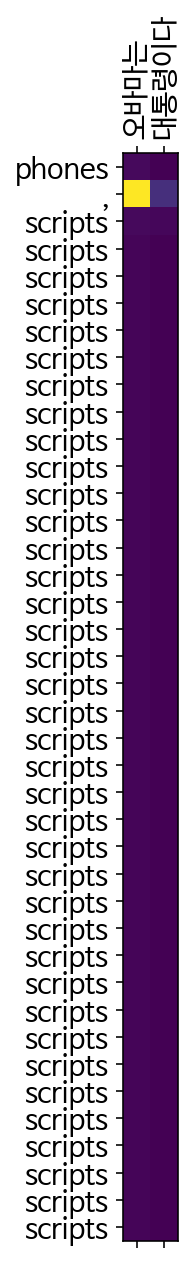

Input: 시민들은 도시 속에 산다
Predicted translation: made widespread to widespread scripts matches to joint final brazilian , mean final brazilian , mean final brazilian , mean final brazilian , mean final brazilian , mean final brazilian , mean final brazilian , mean final brazilian , mean 


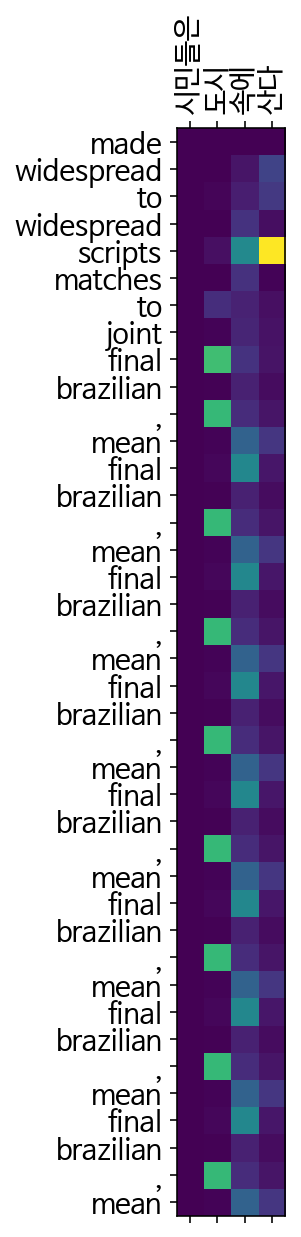

Input: 커피는 필요 없다
Predicted translation: shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup shakeup 


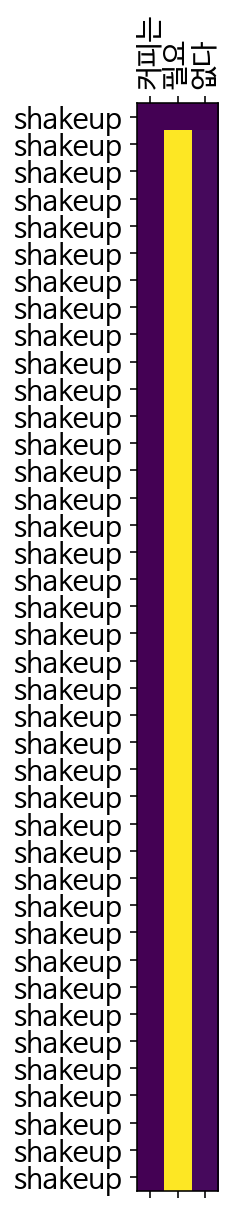

Input: 일곱 명의 사망자가 발생했다
Predicted translation: shakeup , , to <end> 


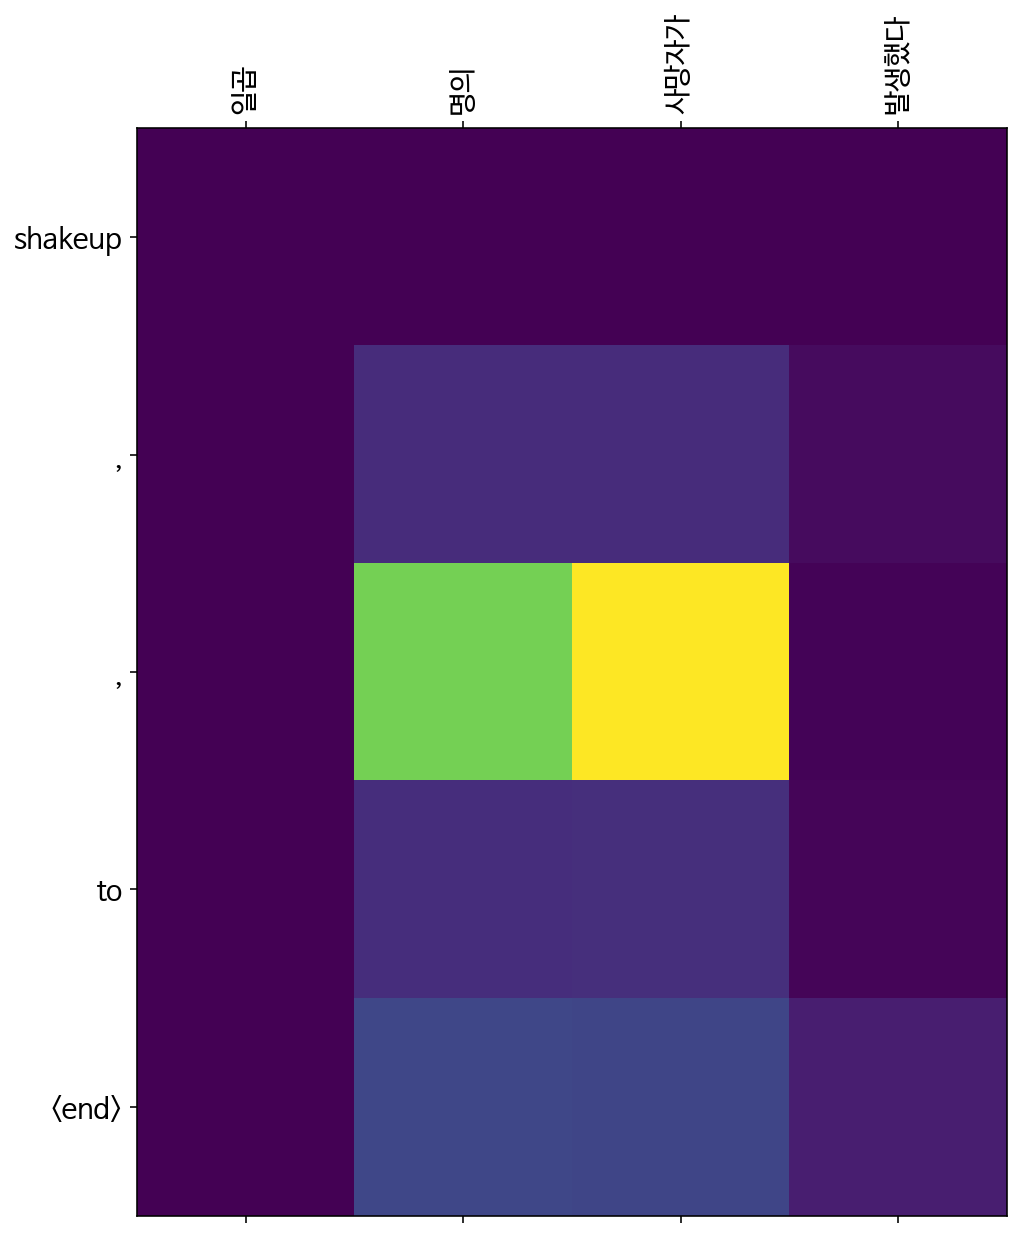

In [32]:
src = ['오바마는 대통령이다.',
       '시민들은 도시 속에 산다.',
       '커피는 필요 없다.',
       '일곱 명의 사망자가 발생했다.']
for sentence in src:
    translate(sentence, encoder, decoder)